#**Submission Proyek Analisis Data**
#Nama : Santianda
#Program : Id Camp
#Studi Kasus : Bike Sharing Dataset


---



---



In [51]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set()

#**Gathering Data**

In [52]:
# Memuat tabel penyewaan sepeda per hari
day_df = pd.read_csv('/content/day.csv')
day_df.head() # Melihat 5 data teratas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
# Memuat tabel penyewaan sepeda per jam
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
# Memerikasa Jumlah Baris dan kolom pada tabel data day_df dan hour_df
jumlah_baris, jumlah_kolom = day_df.shape
print(f"Jumlah Baris pada Tabel day_df: {jumlah_baris}")
print(f"Jumlah Kolom pada Tabel day_df: {jumlah_kolom}")

jumlah_baris, jumlah_kolom = hour_df.shape
print(f"Jumlah Baris pada Tabel hour_df: {jumlah_baris}")
print(f"Jumlah Kolom pada Tabel hour_df: {jumlah_kolom}")

Jumlah Baris pada Tabel day_df: 731
Jumlah Kolom pada Tabel day_df: 16
Jumlah Baris pada Tabel hour_df: 17379
Jumlah Kolom pada Tabel hour_df: 17


Data Bike Sharing day_df berisikan 731 observasi (baris) dengan 16 variabel (kolom) dan hour_df berisikan 17379 observasi (baris) dengan 17 variabel (kolom) dengan penjelasan setiap kolomnya adalah sebagai berikut:

instant : nilai unik sebagai index

dteday : tanggal pencatatan data

season : musim dengan keterangan
- 1:Springer ( Musim Semi )
- 2:Summer ( Musim Panas )
- 3:Fall ( Musim Gugur )
- 4:Winter ( Musim Dingin )

yr : tahun dengan keterangan (0:2011, 1:2012)
mnth : bulan dengan nilai (0 - 12)

holiday : apakah termasuk hari libur (0) atau tidak (1) (berdasarkan holiday)

weekday : hari ke- dalam 1 minggu

workingday : apakah termasuk hari kerja atau tidak (1:Iya, 0:Tidak)

weathersit : keadaan cuaca
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : suhu yang telah dinormalisasikan (dibagi dengan suhu tertinggi 41) dalam Celcius

atemp : suhu terasa seperti, yang telah dinormalisasikan (dibagi dengan suhu tertinggi 51) dalam Celcius

hum : humidity/kelembapan, yang telah dinormalisasikan (dibagi dengan nilai tertinggi 100)

windspeed : kecepatan angin, yang telah dinormalisasikan (dibagi dengan nilai tertinggi 67)

casual: jumlah pengguna casual/tidak terdaftar

registered : jumlah pengguna terdaftar

cnt : jumlah total pengguna casual+`registered``

#**Assesing Data**

Menilai Data pada tabel day_df dan hour_df

In [55]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data pada kedua tabel, untuk kolom dteday seharusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data str).

# Identifikasi Data Tabel day_df dan hour_df

In [57]:
# Memeriksa apakah terdapat missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat dari kedua tabel tidak ada nilai kolom dan baris yang missing value

**Memeriksa apakah kedua tabel terdapat data duplicate dan memeriksa ringksan pada parameter statistik dari kolom numerik**

In [59]:
print("jumlah data duplicate : ", day_df.duplicated().sum())
day_df.describe()

jumlah data duplicate :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
print("Jumlah data duplicate :", hour_df.duplicated().sum())
hour_df.describe()

Jumlah data duplicate : 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil dari kedua tabel di atas ridak ada data duplicated dan tidak ada keanehan dalam ringkasan parameter statistik kedua tabel

# Cleaning Data
Berdasarkan proses assesing data sebelumnya, diketahui terdapat kesalahan pada tipe data untuk kolom dteday.Kita akan mengubah tipe data dteday menjadi datetime

In [61]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [62]:
hour_df["dteday"]= pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Type kolom dteday pada kedua tabel telah bertype datetime

# Menentukan Pertanyaan Bisnis
- Bagaimana tren penyewaan sepeda per hari dan parameter apa saja yang membuat banyaknya penyewa sepeda?
- Bagaimana pengaruh antara musim dan jumlah sewa sepeda  harian?
- Bagaimana pengaruh parameter temp, atemp, hum, windspeed, casual, registere, terhadap cnt ( banyaknay penyewa sepeda)?

---



**Explatory Data Analysis (EDA)**

In [63]:
# Selanjutnya melihat demografi penyewa sepeda berdasarkan jenis musim
day = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})
print("Demograsi Tabel  Day :", day)


hour = hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})
print('Demografi Tabel Hour :', hour)

Demograsi Tabel  Day :        instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261
Demografi Tabel Hour :        instant  cnt                            
       nunique  max min        mean         std
season                                         
1         4242  801   1  111.114569  119.224010
2         4409  957   1  208.344069  188.362473
3         4496  977   1  236.016237  197.711630
4         4232  967   1  198.868856  182.967972


- Berdasarkan Pivot tabel diatas demografi penyewa sepeda harian  paling banyak musim ke -3 sebanyak 1115 unit dan paling sedikit 22 unit dan terlihat juga selama tahun 2011 - 2012 paling banyak sepeda disewa pada musim ke-3 sebanyak 8714 unit dan paling sedikit musim ke-1 sebanyak 7836. sehingga untuk memaksimalkan pendapatan kita dapat melakukan promosi pada musim ke-2.

- Berdasarkan Pivot tabel diatas demografi sewa sepeda per jam paling banyak pada musim ke-3, 4, 2 dan 1 kalau dilihat perbedaan jumlah unit sewa sepeda musim ke 2, 3, 4 tidak terlalu jauh dibandingkan dengan musim ke-1

In [64]:
# Melihat demografi penyewa sepeda berdasarkan cuaca
day = day_df.groupby(by='weathersit').agg({
    "instant":'nunique',
    'cnt': ['max', 'min', 'mean', 'std']
})
print('Demografi penyewa sepeda per hari:',day)


hour = hour_df.groupby(by='weathersit').agg({
    "instant":'nunique',
    'cnt': ['max', 'min', 'mean', 'std']
})
print('Demografi penyewa sepeda per jam :',hour)

Demografi penyewa sepeda per hari:            instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449
Demografi penyewa sepeda per jam :            instant  cnt                            
           nunique  max min        mean         std
weathersit                                         
1            11413  977   1  204.869272  189.487773
2             4544  957   1  175.165493  165.431589
3             1419  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178


In [65]:
# Melihat Pesebaran data day_df
print('Data day_df')
print('pivot tabel data day :', day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data day :', day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False))

Data day_df
pivot tabel data day : holiday
0    679
1     20
Name: cnt, dtype: int64
pivot tabel data day : weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64
pivot tabel data day : workingday
1    487
0    223
Name: cnt, dtype: int64
pivot tabel data day : yr
1    356
0    352
Name: cnt, dtype: int64


In [66]:
# Melihat Pesebaran data hour_df
print('Data hour_df')
print('pivot tabel data hour :', hour_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False))
print('pivot tabel data hour :', hour_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False))

Data hour_df
pivot tabel data hour : holiday
0    869
1    276
Name: cnt, dtype: int64
pivot tabel data hour : weekday
3    616
6    609
4    606
2    598
1    595
5    584
0    571
Name: cnt, dtype: int64
pivot tabel data hour : workingday
1    856
0    676
Name: cnt, dtype: int64
pivot tabel data hour : yr
1    866
0    585
Name: cnt, dtype: int64


#**Visualisasi Data**

**Visualisasi penyewaan sepeda per hari**

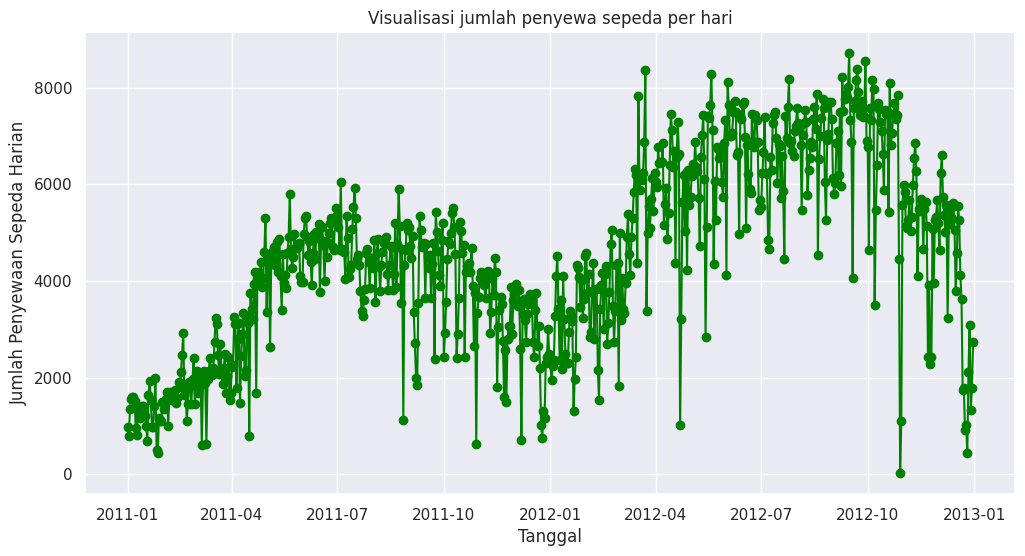

In [67]:
# Membuat time series plot  untuk melihat performa jumlah penyewa sepeda
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'], marker='o', linestyle='-', color='green')
plt.title('Visualisasi jumlah penyewa sepeda per hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda Harian')
plt.show()

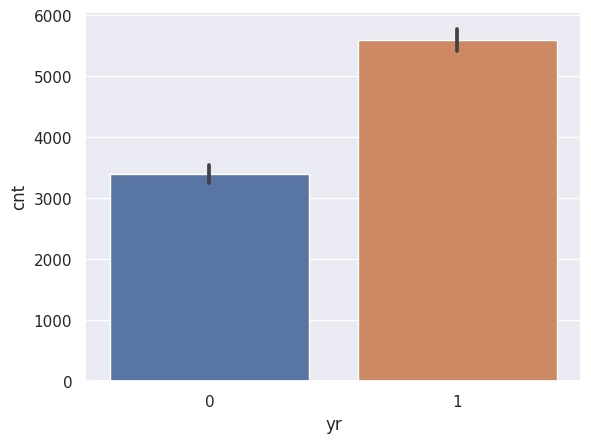

In [68]:
sns.barplot(x='yr', y='cnt',data=day_df)
plt.show()

Permintaan penyewaan sepeda meningkat dari tahun 2011 ke 2012

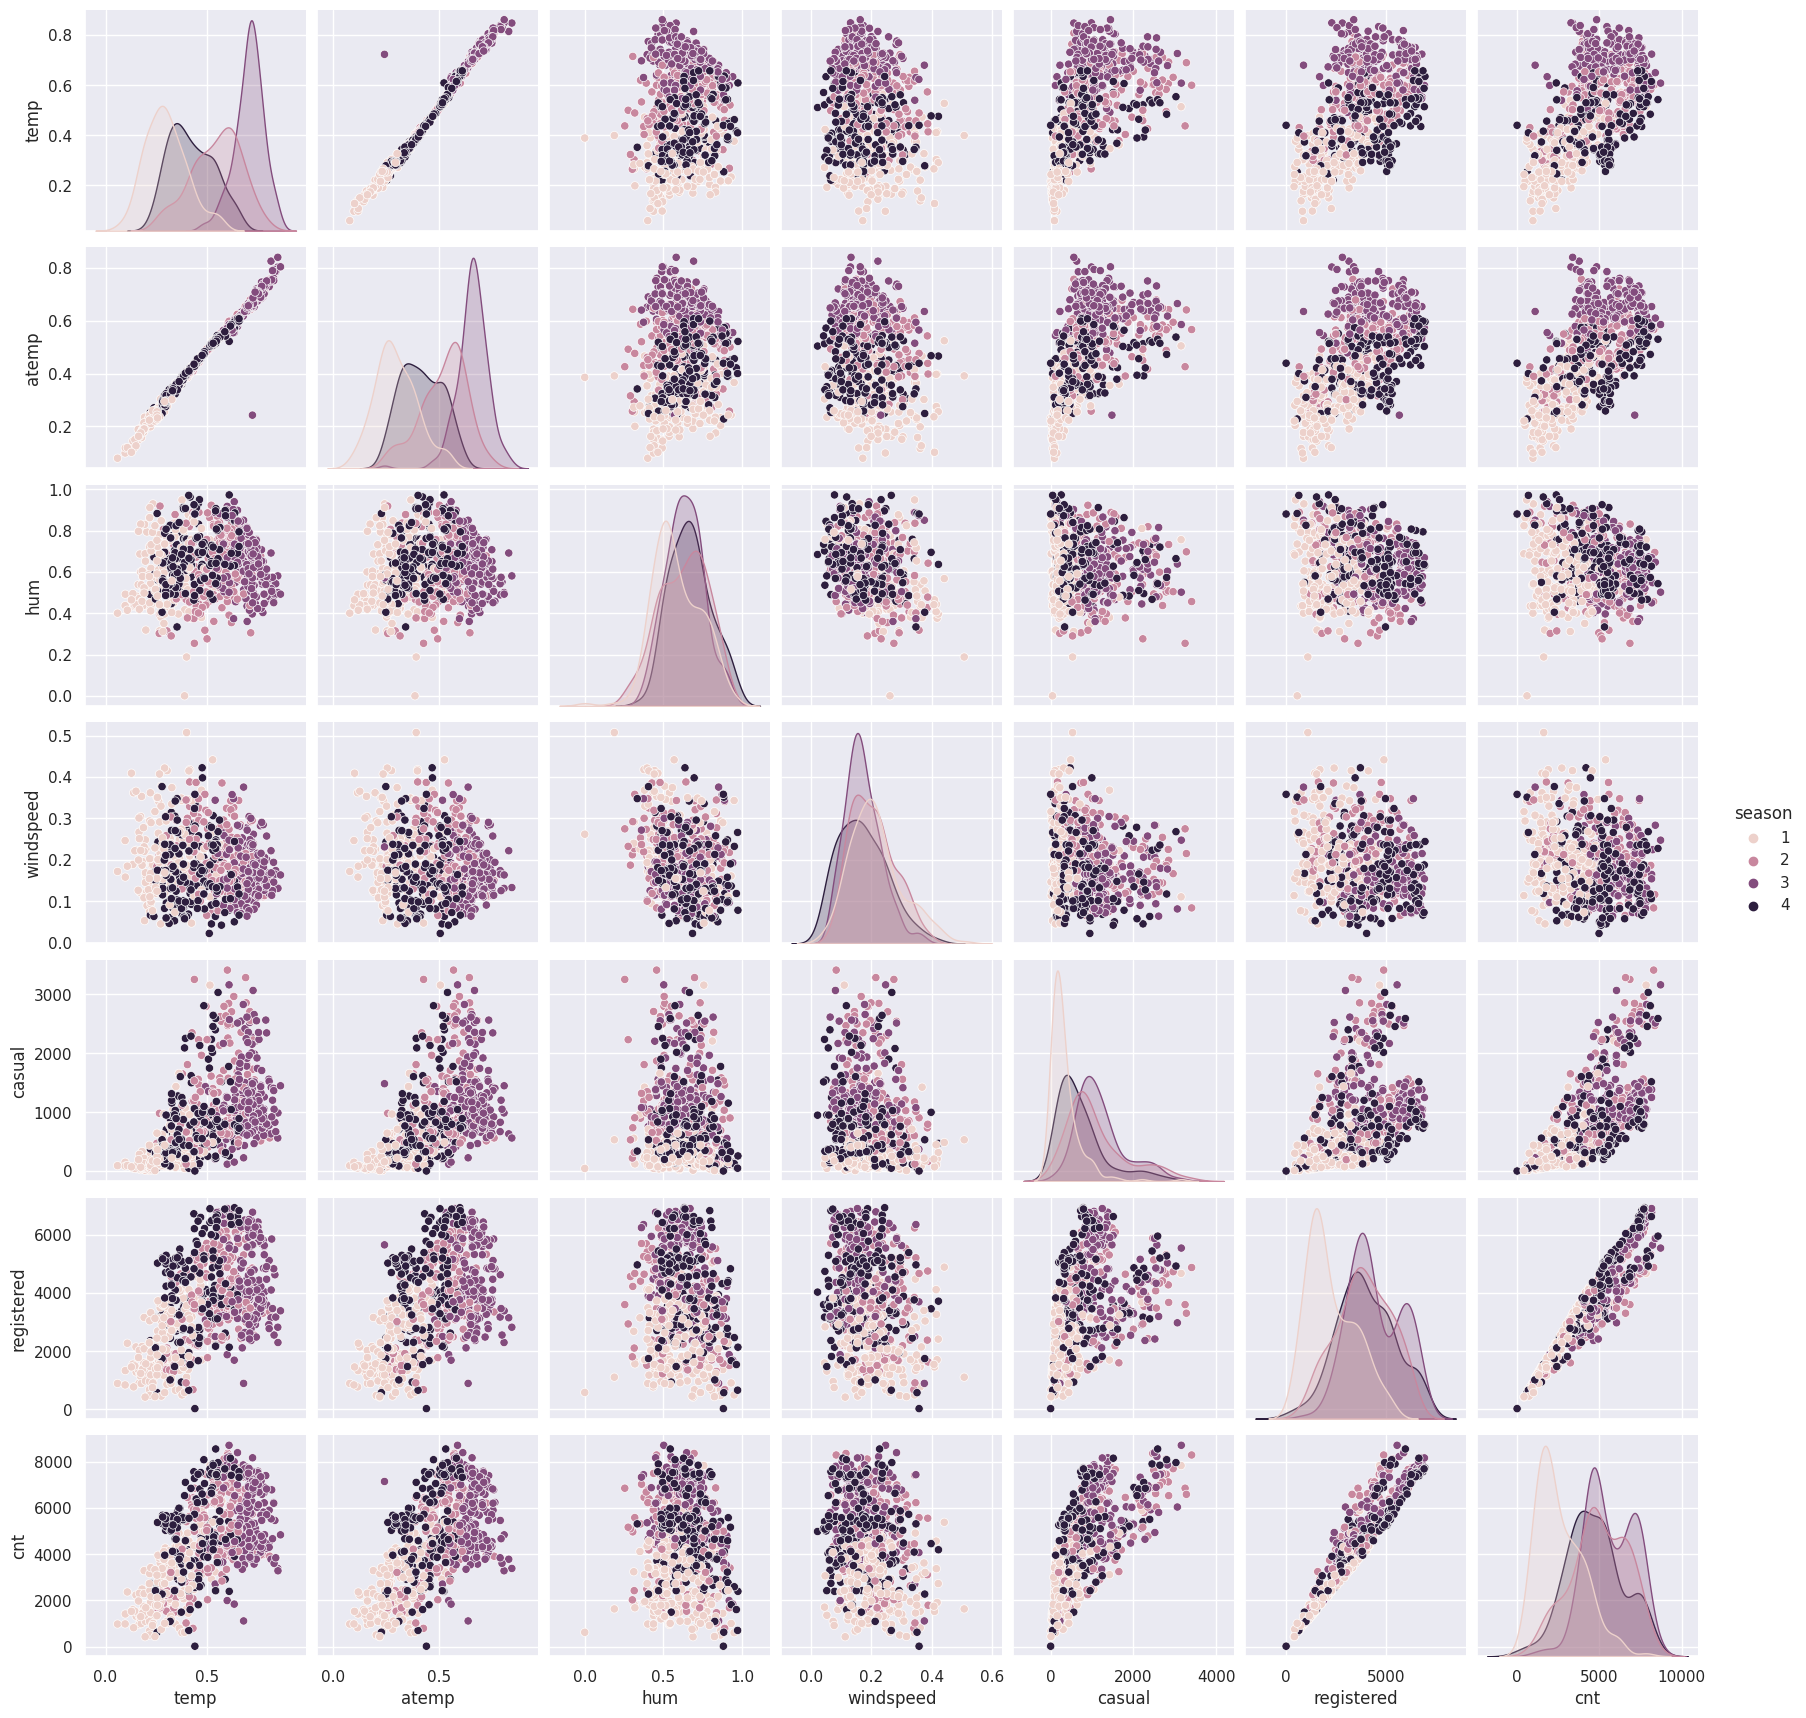

In [69]:
# Kita akkan melihat ringkasan data numerik secara cepat
sns.pairplot(day_df,vars=['temp','atemp','hum','windspeed','casual', 'registered','cnt'], hue="season")
plt.show()

Dari visualisasi menggunakan pairplot kita dapat melihat distribusi penyebaran tiap parameter cukup merata

<Axes: >

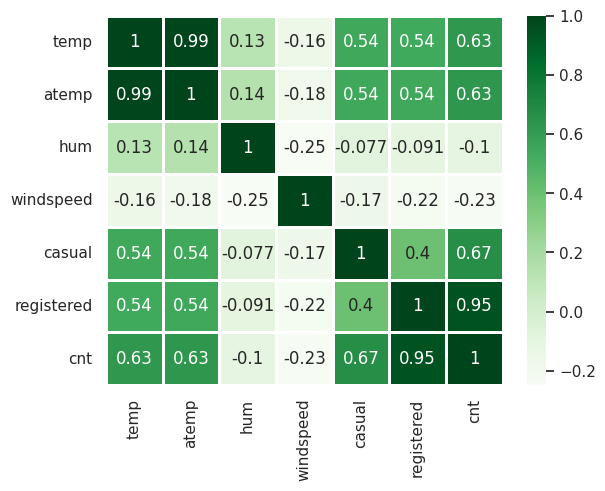

In [70]:
day_new = day_df[['temp','atemp','hum','windspeed','casual', 'registered','cnt']]
sns.heatmap(day_new.corr(), annot=True, cmap='Greens', linewidths=1)

Dapat dilihat bahwa jika nilai parameter mendekati 1 atau sama dengan satu maka parameter saling berkorelasi positif, jika nilai parameter sama dengan nol maka parameter tidak saling berkorelasi, dan jika mendekali -1 atau sama dengan -1 maka parameter saling berkorelasi negatif.

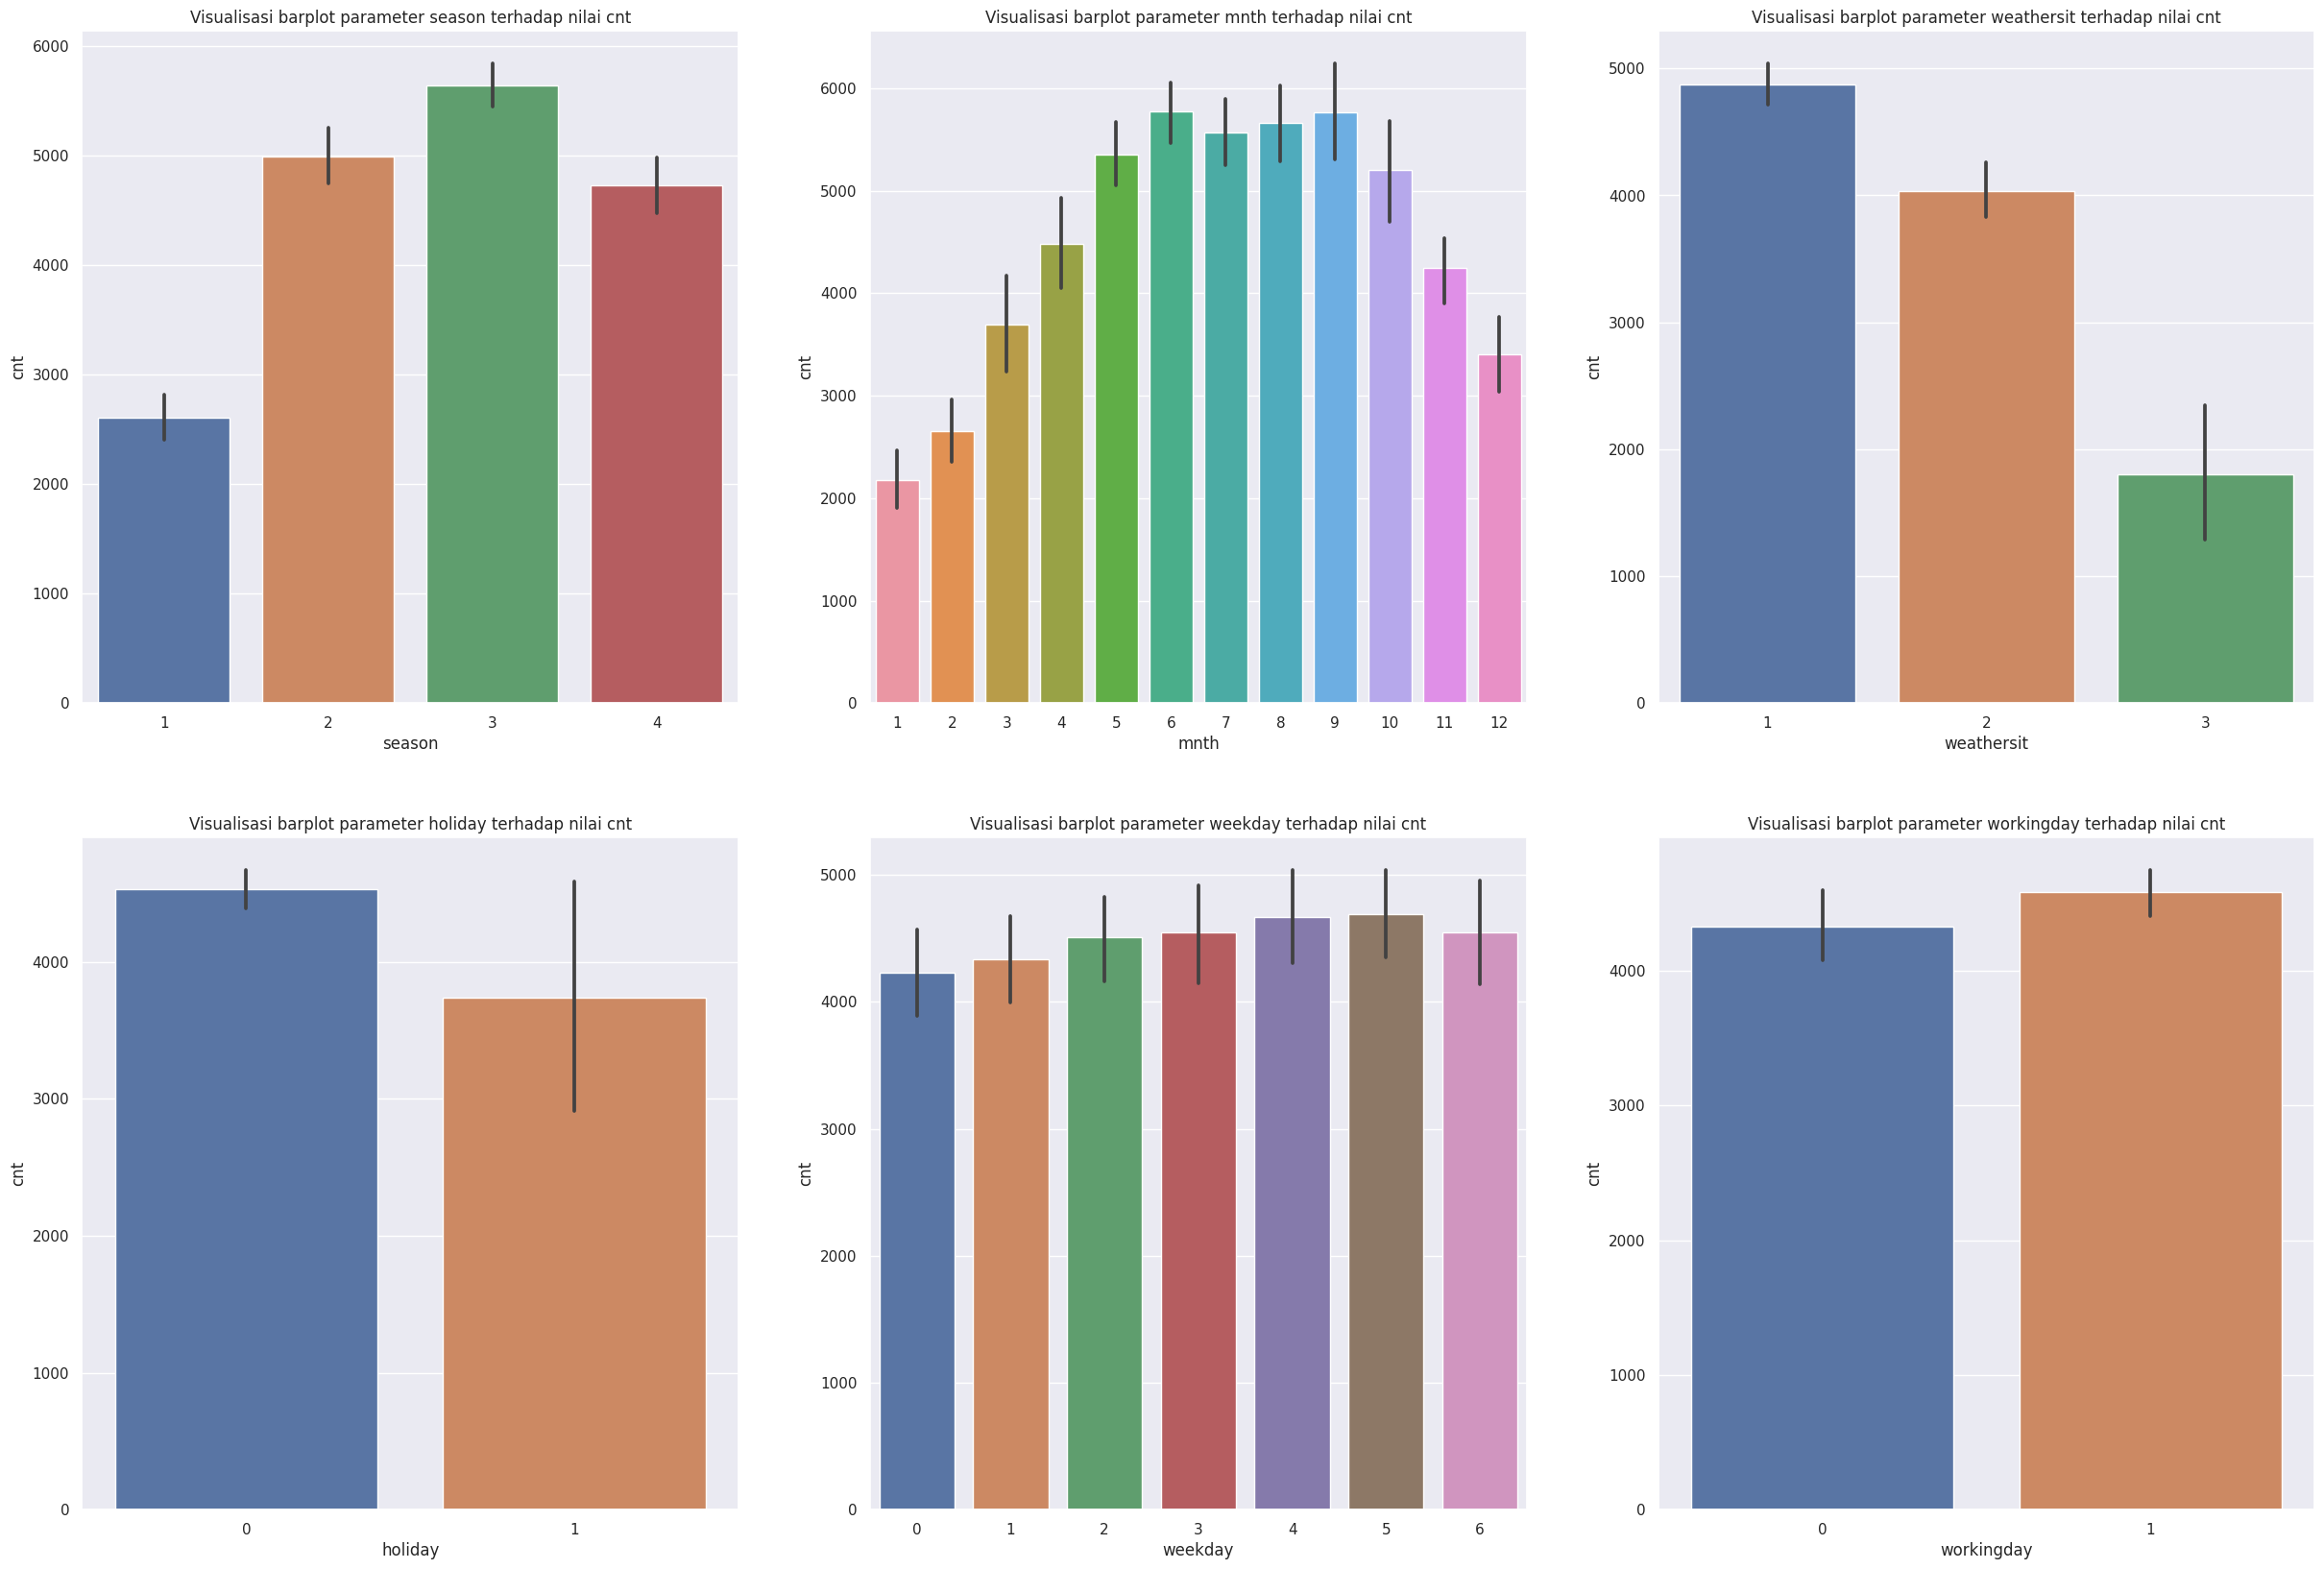

In [71]:
# Visualisasi menggunakan barplot semua parameter terhadap 'cnt'

plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.barplot(x='season', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter season terhadap nilai cnt")
plt.subplot(2,3,2)
sns.barplot(x='mnth', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter mnth terhadap nilai cnt")
plt.subplot(2,3,3)
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter weathersit terhadap nilai cnt")
plt.subplot(2,3,4)
sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter holiday terhadap nilai cnt")
plt.subplot(2,3,5)
sns.barplot(x='weekday', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter weekday terhadap nilai cnt")
plt.subplot(2,3,6)
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title("Visualisasi barplot parameter workingday terhadap nilai cnt")
plt.show()


Dari Visualisasi barplot di atas kita dapat melihat rata-rata penyewa sepeda per hari dari setiap parameter

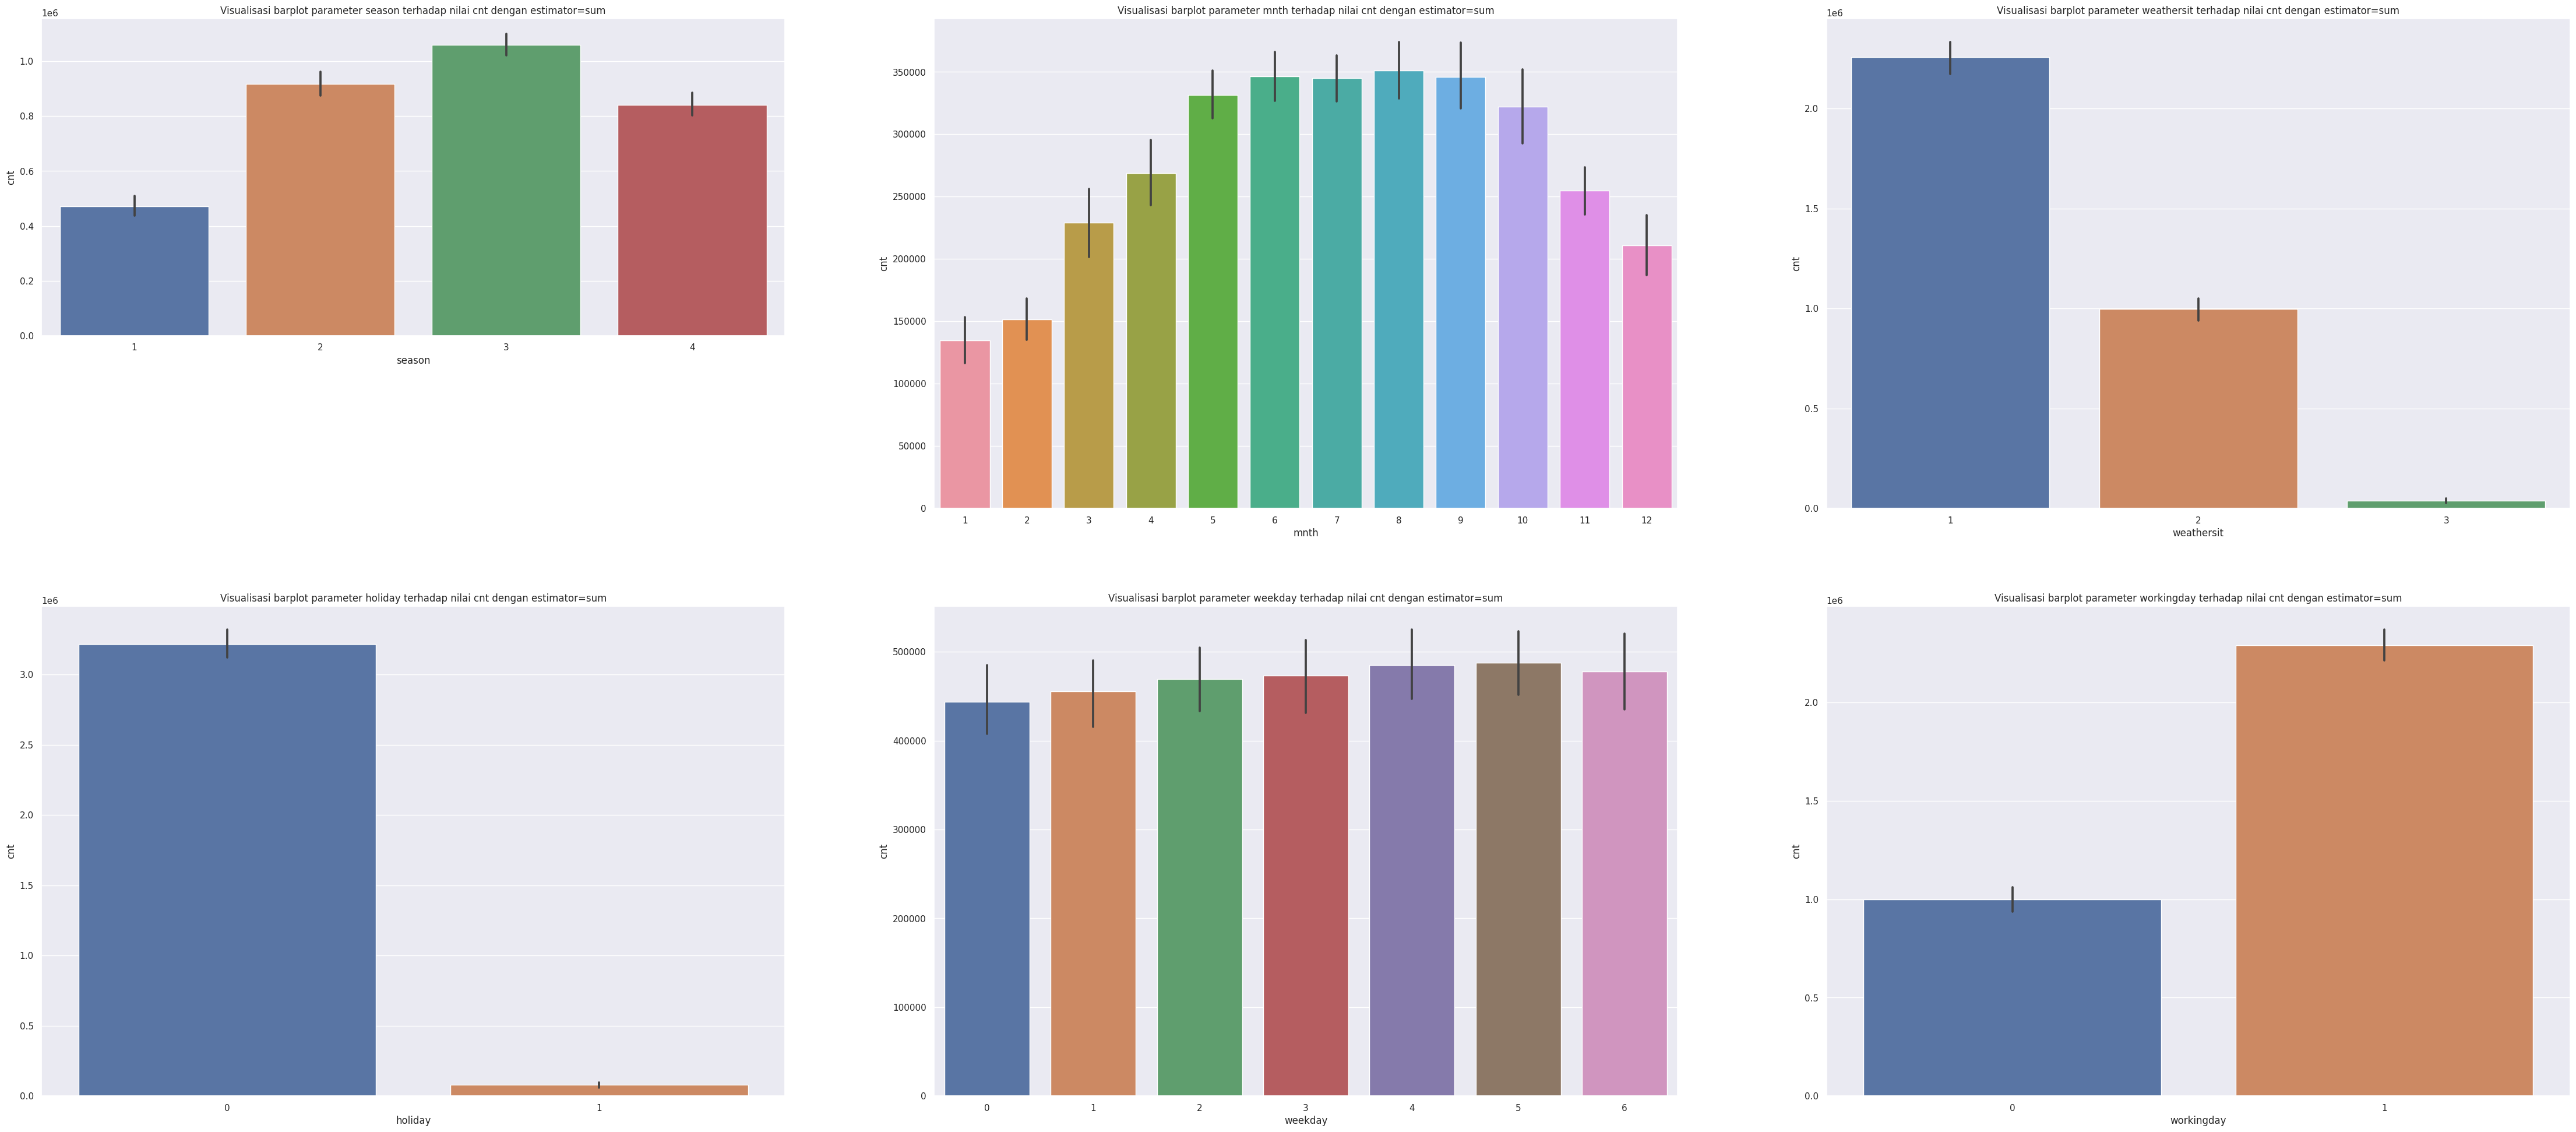

In [72]:
# Visualisasi menggunakan barplot semua parameter terhadap 'cnt' dengan estimator=sum

plt.figure(figsize=(56,24))

plt.subplot(3,3,1)
sns.barplot(x='season', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter season terhadap nilai cnt dengan estimator=sum")
plt.subplot(2,3,2)
sns.barplot(x='mnth', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter mnth terhadap nilai cnt dengan estimator=sum")
plt.subplot(2,3,3)
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter weathersit terhadap nilai cnt dengan estimator=sum")
plt.subplot(2,3,4)
sns.barplot(x='holiday', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter holiday terhadap nilai cnt dengan estimator=sum")
plt.subplot(2,3,5)
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter weekday terhadap nilai cnt dengan estimator=sum")
plt.subplot(2,3,6)
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum)
plt.title("Visualisasi barplot parameter workingday terhadap nilai cnt dengan estimator=sum")
plt.show()

Dari Visualisasi barplot di atas kita dapat melihat jumlah penyewa sepeda per hari dari setiap parameter

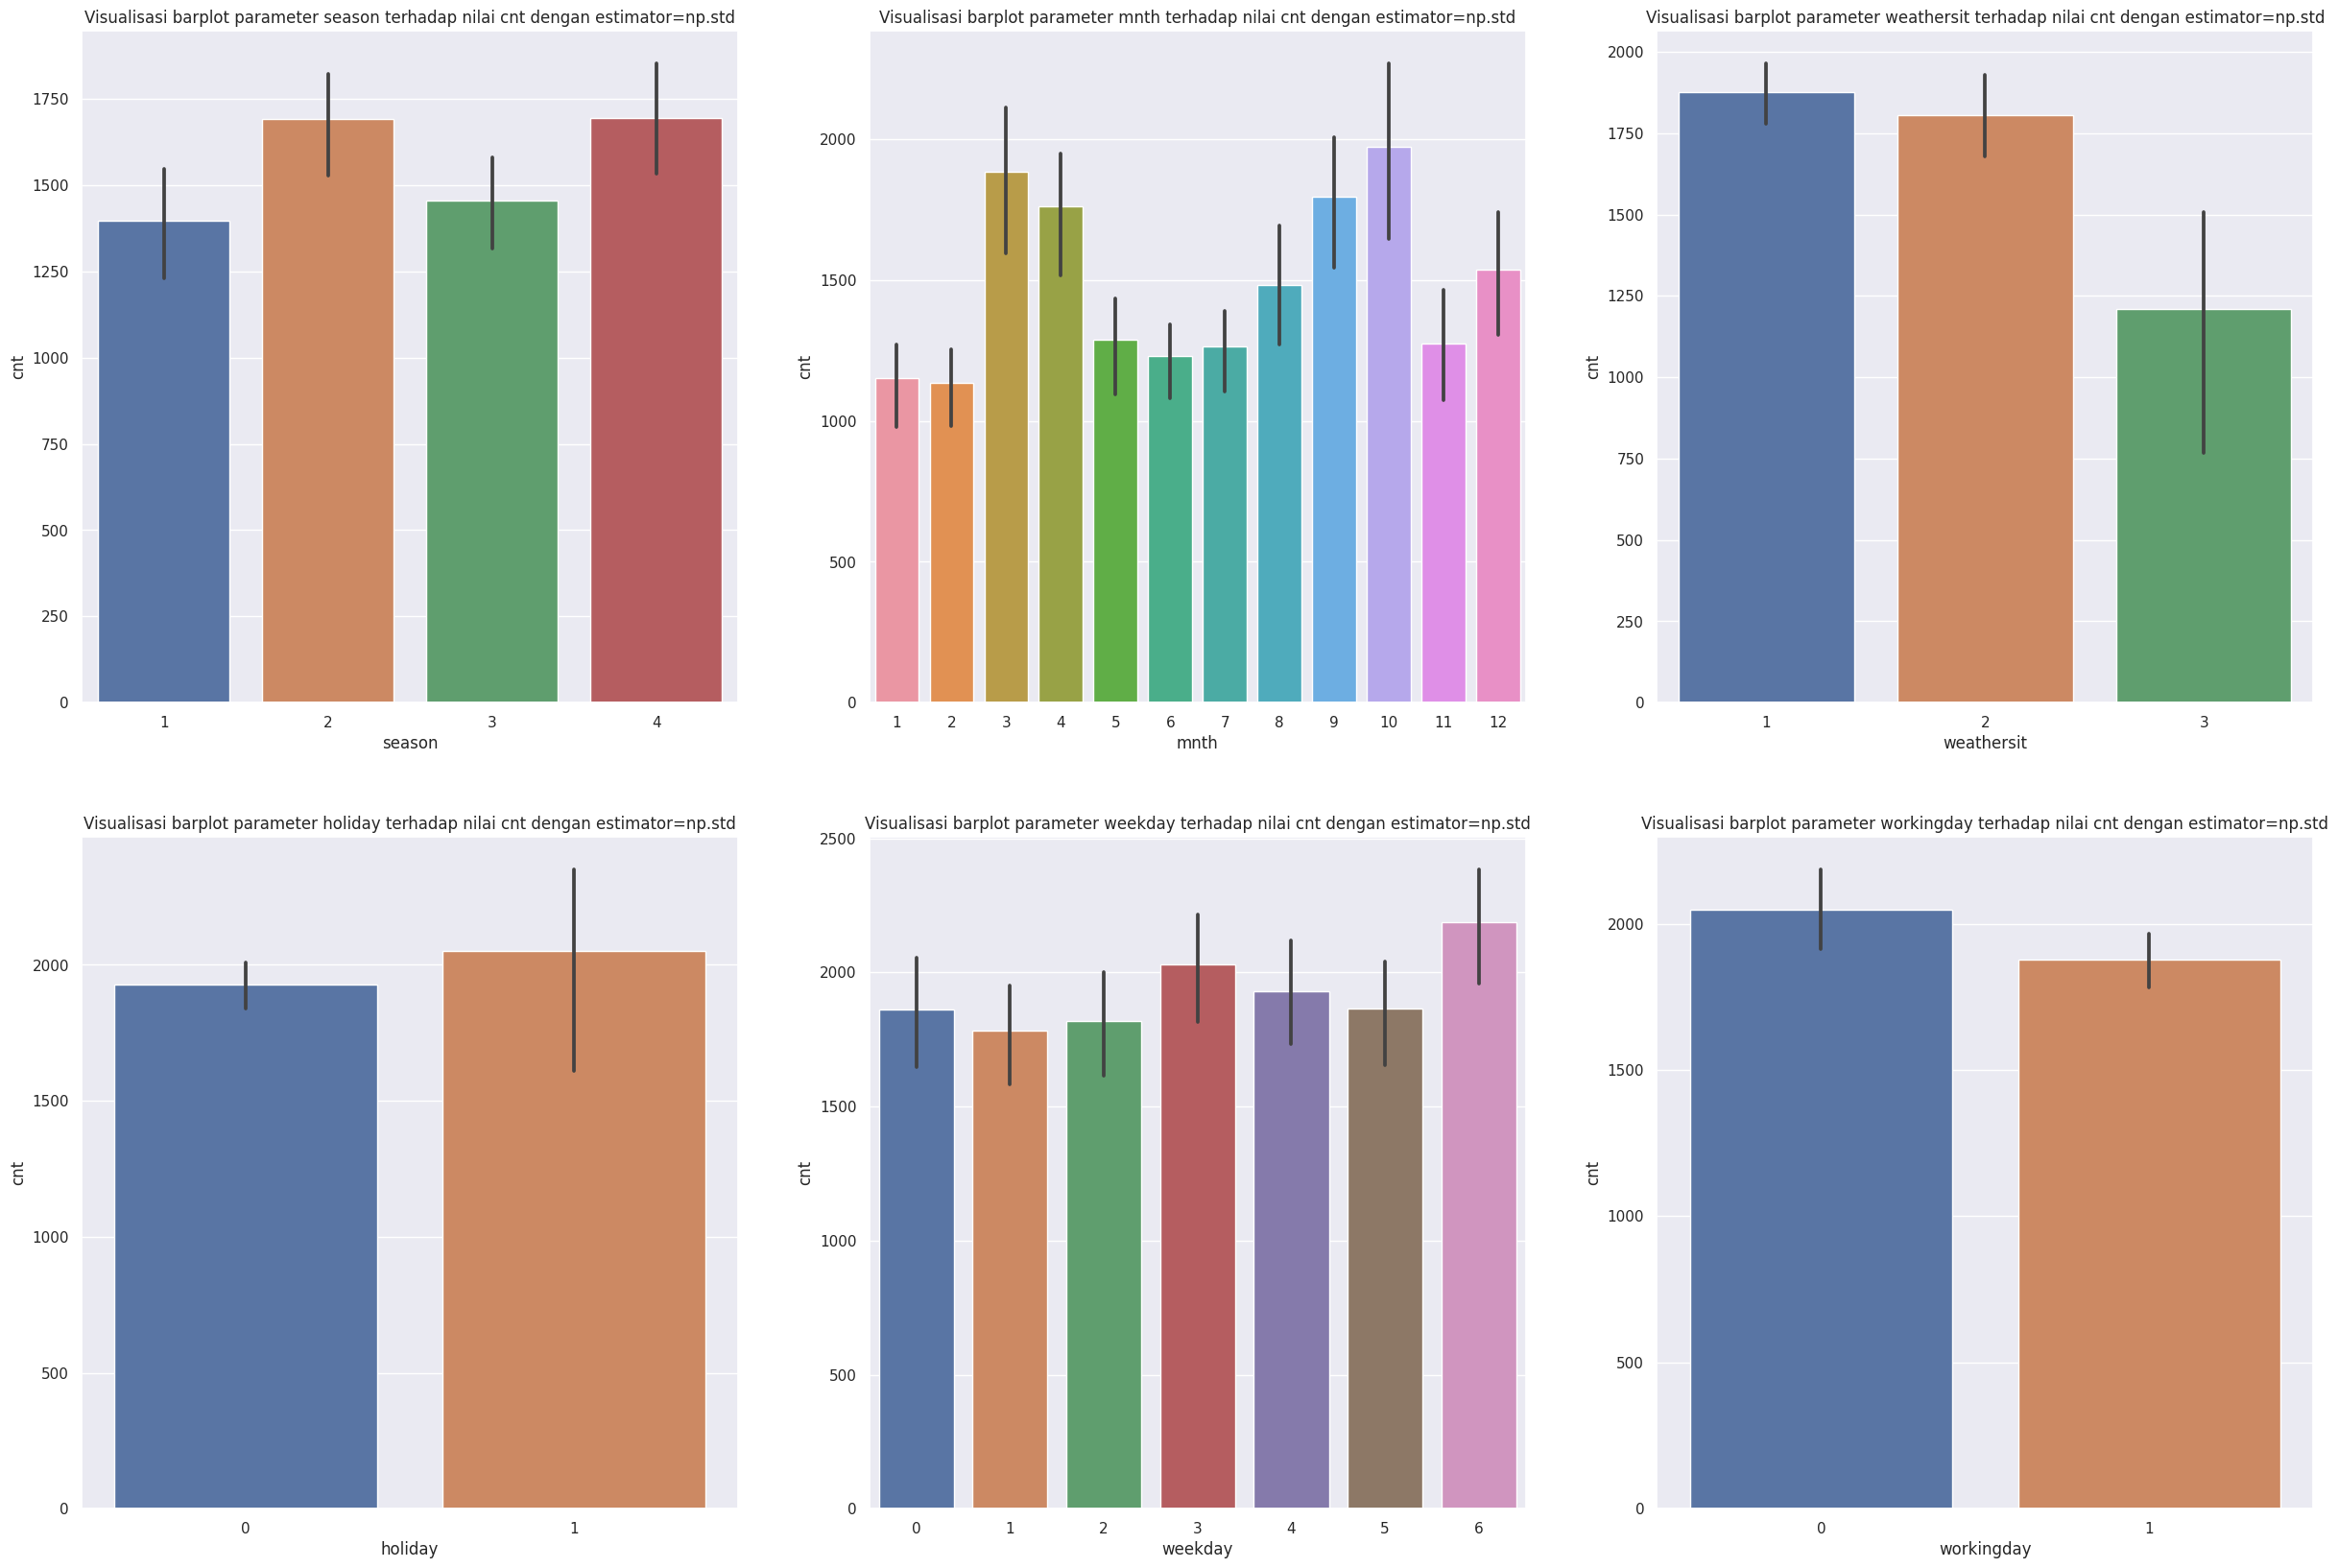

In [73]:
# Visualisasi menggunakan barplot semua parameter terhadap 'cnt' dengan estimator=np.std

plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.barplot(x='season', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter season terhadap nilai cnt dengan estimator=np.std")
plt.subplot(2,3,2)
sns.barplot(x='mnth', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter mnth terhadap nilai cnt dengan estimator=np.std")
plt.subplot(2,3,3)
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter weathersit terhadap nilai cnt dengan estimator=np.std")
plt.subplot(2,3,4)
sns.barplot(x='holiday', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter holiday terhadap nilai cnt dengan estimator=np.std")
plt.subplot(2,3,5)
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter weekday terhadap nilai cnt dengan estimator=np.std")
plt.subplot(2,3,6)
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=np.std)
plt.title("Visualisasi barplot parameter workingday terhadap nilai cnt dengan estimator=np.std")
plt.show()

Dari Visualisasi barplot di atas kita dapat melihat standar deviasi penyewa sepeda per hari dar setiap parameter

**Memvisualisasikan parameter-parameter terhadap jumlah pesanan sewa sepeda**

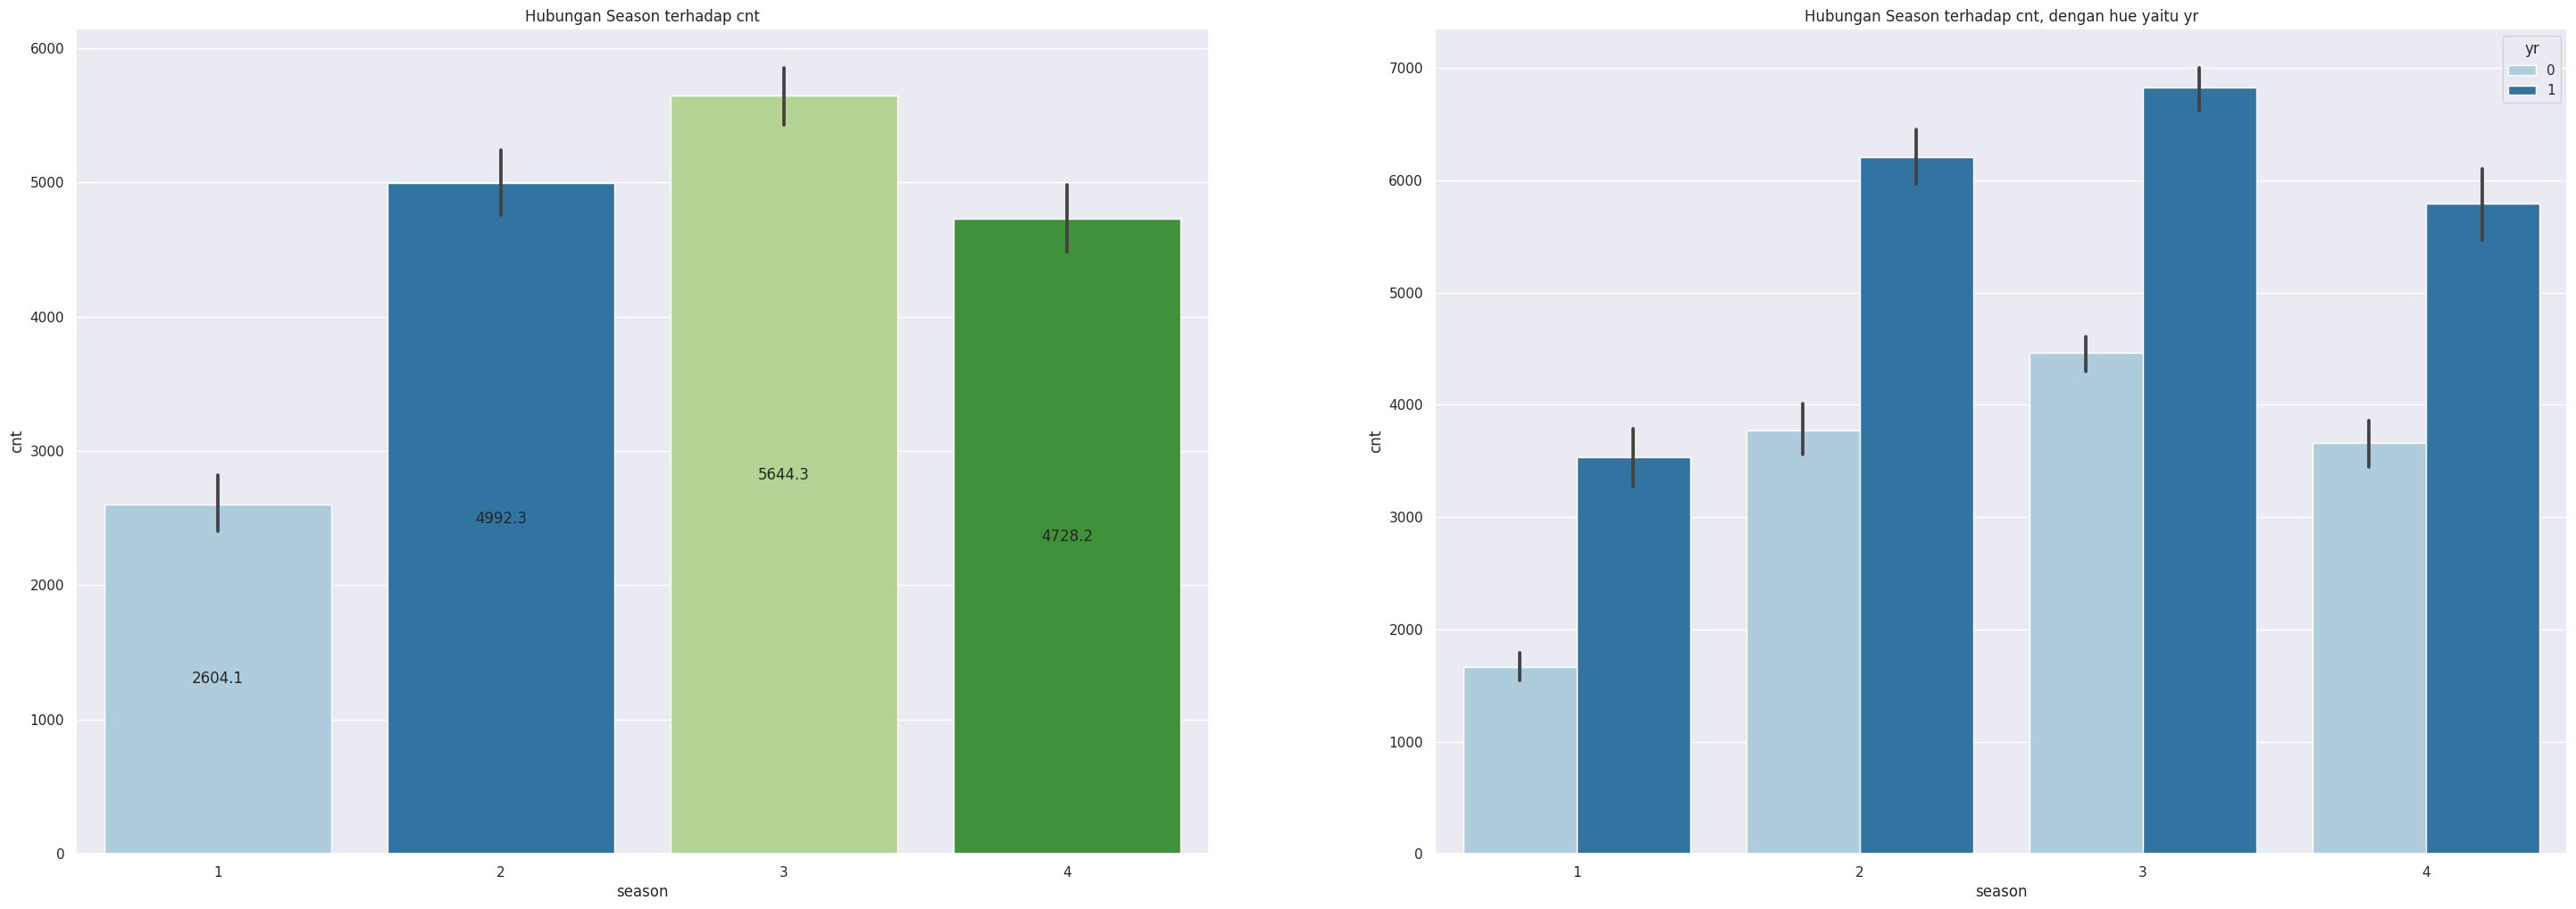

In [74]:
plt.figure(figsize=(36,12))
plt.subplot(1,2,1)
ax = sns.barplot(x='season',y='cnt', data=day_df,palette='Paired')
plt.title("Hubungan Season terhadap cnt")
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(1,2,2)
plt.title("Hubungan Season terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='season',y='cnt', hue='yr', data=day_df,palette='Paired')

Pivot di atas 32% dari pemesanan sepeda terjadi pada musim gugur (3) dengan rata-rata lebih dari 5.644,3 pemesanan (selama dua tahun). Diikuti oleh Musim Panas (2) & Musim Dingin (4) dengan 27% & 25% dari total pemesanan. Hal ini menunjukkan bahwa musim dapat digunakan untuk memprediksi jumlah penyewa sepeda lebih lanjut.

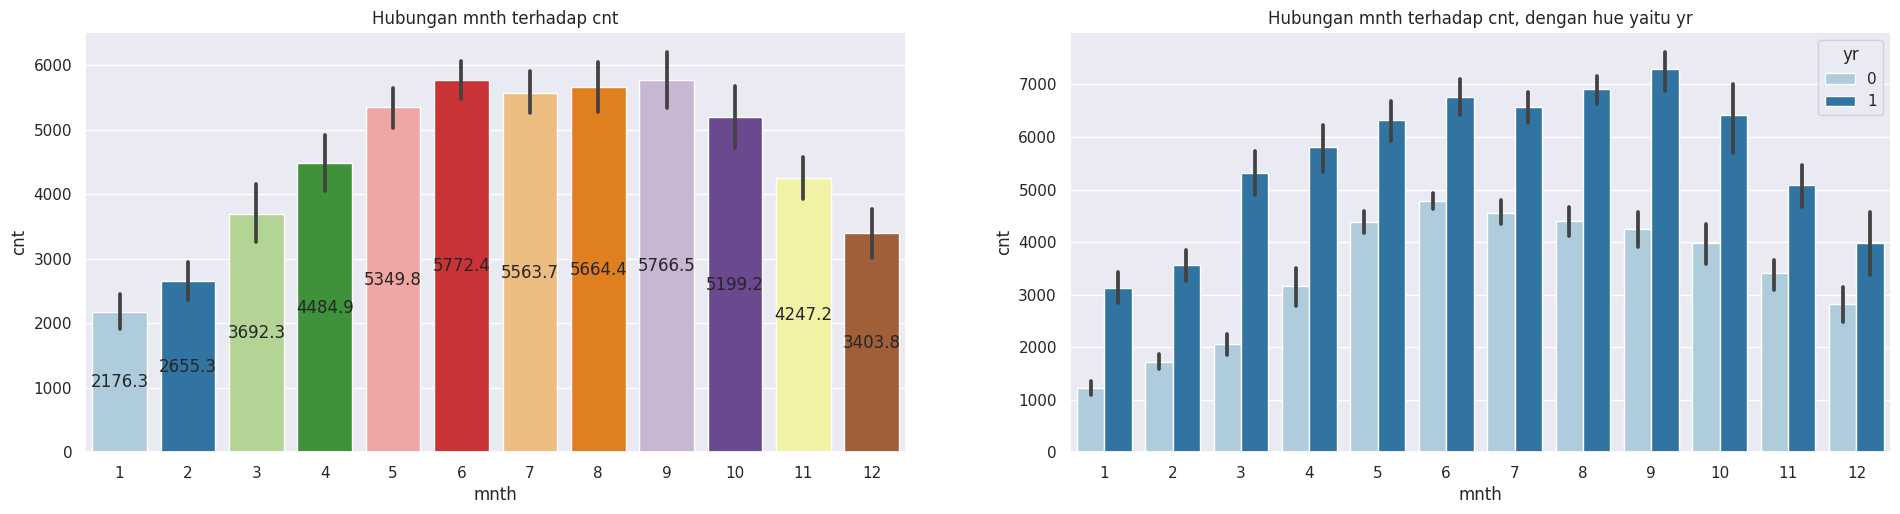

In [75]:
plt.figure(figsize=(36,12))
plt.subplot(2,3,1)
plt.title("Hubungan mnth terhadap cnt")
ax = sns.barplot(x='mnth',y='cnt', data=day_df,palette='Paired')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(2,3,2)
plt.title("Hubungan mnth terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='mnth',y='cnt', hue='yr', data=day_df,palette='Paired')

 Pivot di atas menunjukkan cukup bervariasi jumlah pemesanan sewa sepeda dengan rata-rata tertinggi jumlah sewa sepeda pada bulan 6 yaitu 5772,4 unit dan terendah pada bulan ke -1 yaitu 2176,3 unit. Hal ini menujukkan bahwa parameter bulan memiliki tren dan dapat digunakan untuk memprediksi jumlah penyewa sepeda lebih lanjut.

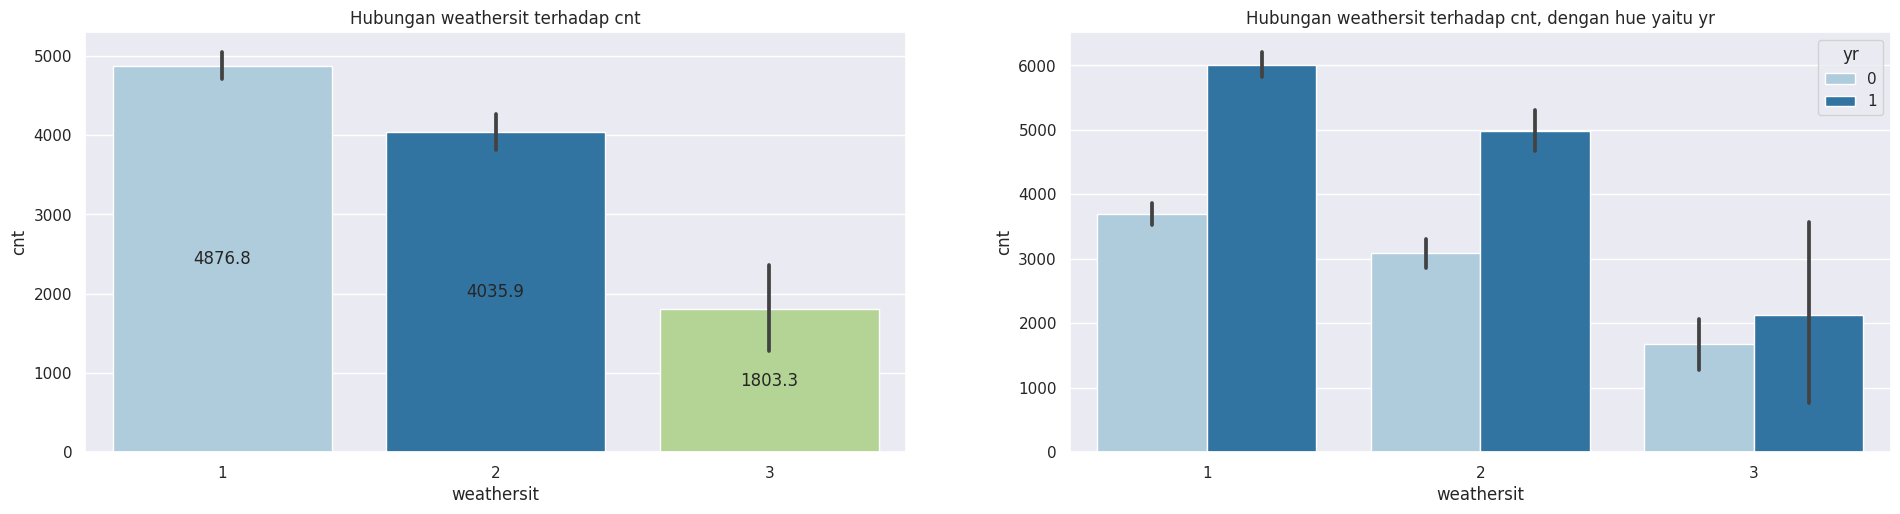

In [76]:
plt.figure(figsize=(36,12))
plt.subplot(2,3,1)
plt.title("Hubungan weathersit terhadap cnt")
ax = sns.barplot(x='weathersit',y='cnt', data=day_df,palette='Paired')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(2,3,2)
plt.title("Hubungan weathersit terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='weathersit',y='cnt', hue='yr', data=day_df,palette='Paired')

Pivot di atas 46% dari pemesanan sepeda terjadi saat cuaca cerah dengan rata-rata hampir 4876.8 pemesanan (selama dua tahun). Hal ini diikuti oleh cuaca Berawan dengan 37% dari total pemesanan. Hal ini menunjukkan bahwa cuaca memiliki tren dan dapat digunakan untuk memprediksi jumlah penyewa sepeda lebih lanjut.

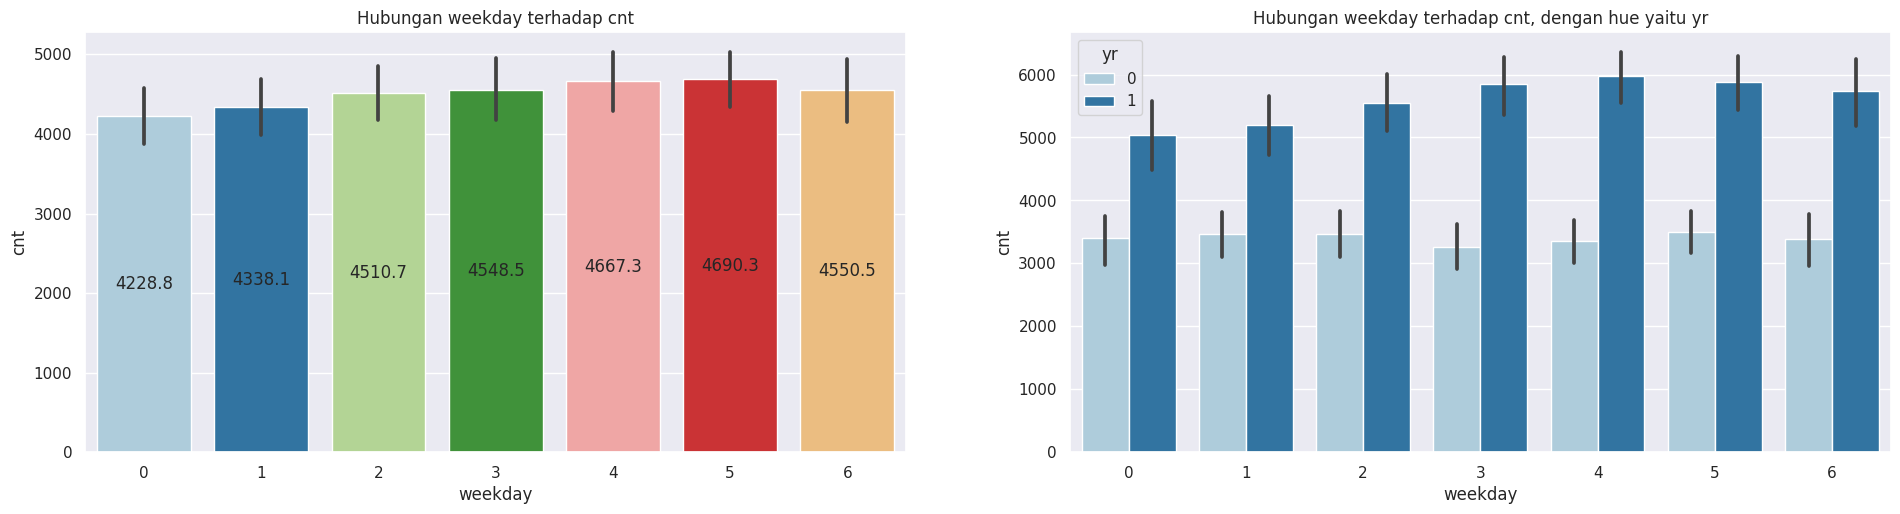

In [77]:
plt.figure(figsize=(36,12))
plt.subplot(2,3,1)
plt.title("Hubungan weekday terhadap cnt")
ax = sns.barplot(x='weekday',y='cnt', data=day_df,palette='Paired')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(2,3,2)
plt.title("Hubungan weekday terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='weekday',y='cnt', hue='yr', data=day_df,palette='Paired')

Pivot di atas  menunjukkan tren yang sangat dekat antara hari ke 0 ~ hari ke 6 dan variabel ini dapat memiliki sedikit atau tidak memiliki pengaruh terhadap jumlah pemesanan sepeda untuk disewa, sehingga diperlukan analisis lebih lanjut apakah variabel ini diperlukan untuk membuat model dalam meningkatkan pesanan jumlah penyewa sepeda.

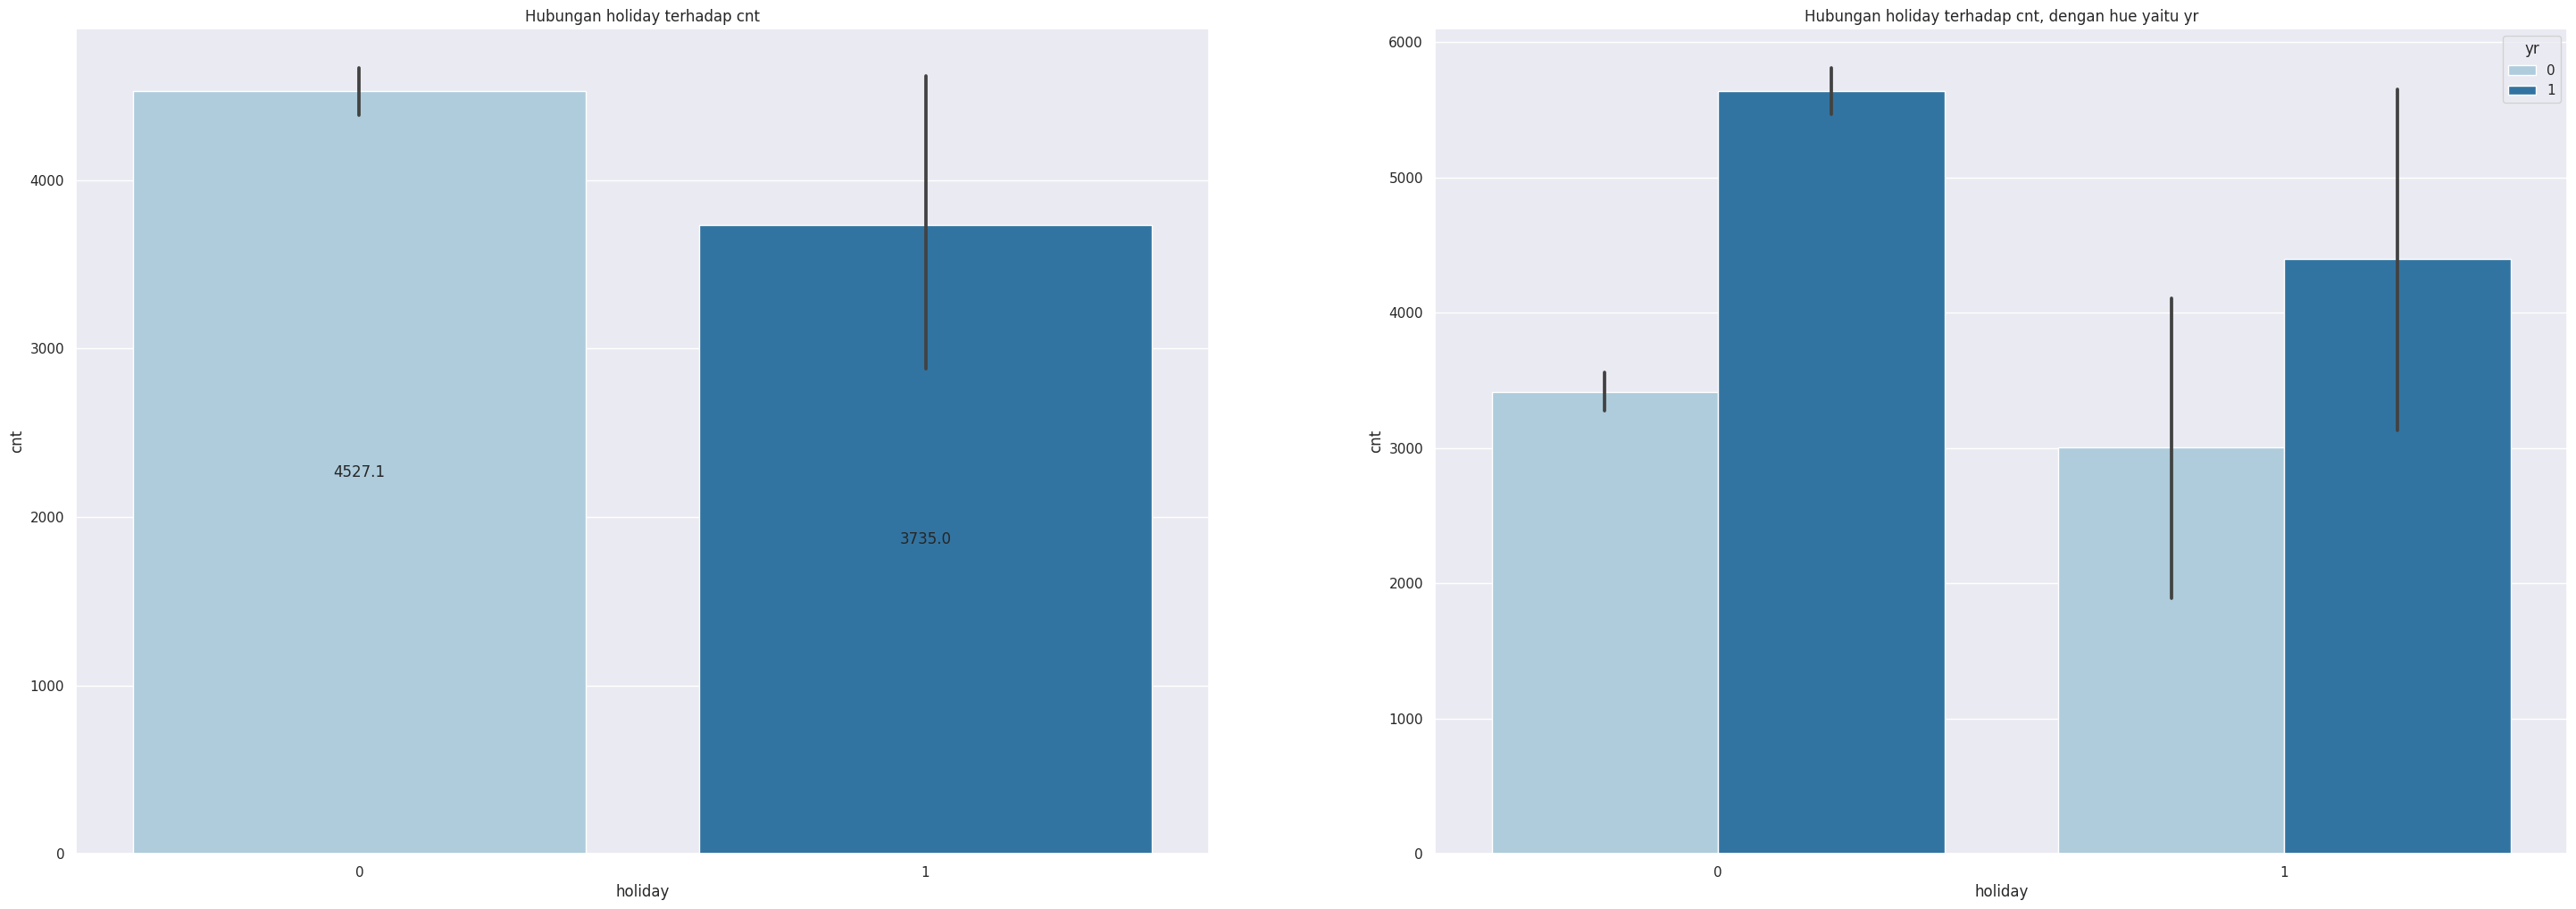

In [78]:
plt.figure(figsize=(36,12))
plt.subplot(1,2,1)
plt.title("Hubungan holiday terhadap cnt")
ax = sns.barplot(x='holiday',y='cnt', data=day_df,palette='Paired')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(1,2,2)
plt.title("Hubungan holiday terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='holiday',y='cnt', hue='yr', data=day_df,palette='Paired')

Pivot diatas 55% dari penyewaan sepeda terjadi selama bukan hari liburan (0) yaitu rata-rata sebanyak 4527.1 pemesanan. Hal ini menunjukkan bahwa bukan hari libur memiliki tren dan dapat dipertimbangan digunakan untuk memprediksi jumlah penyewa sepeda lebih lanjut.

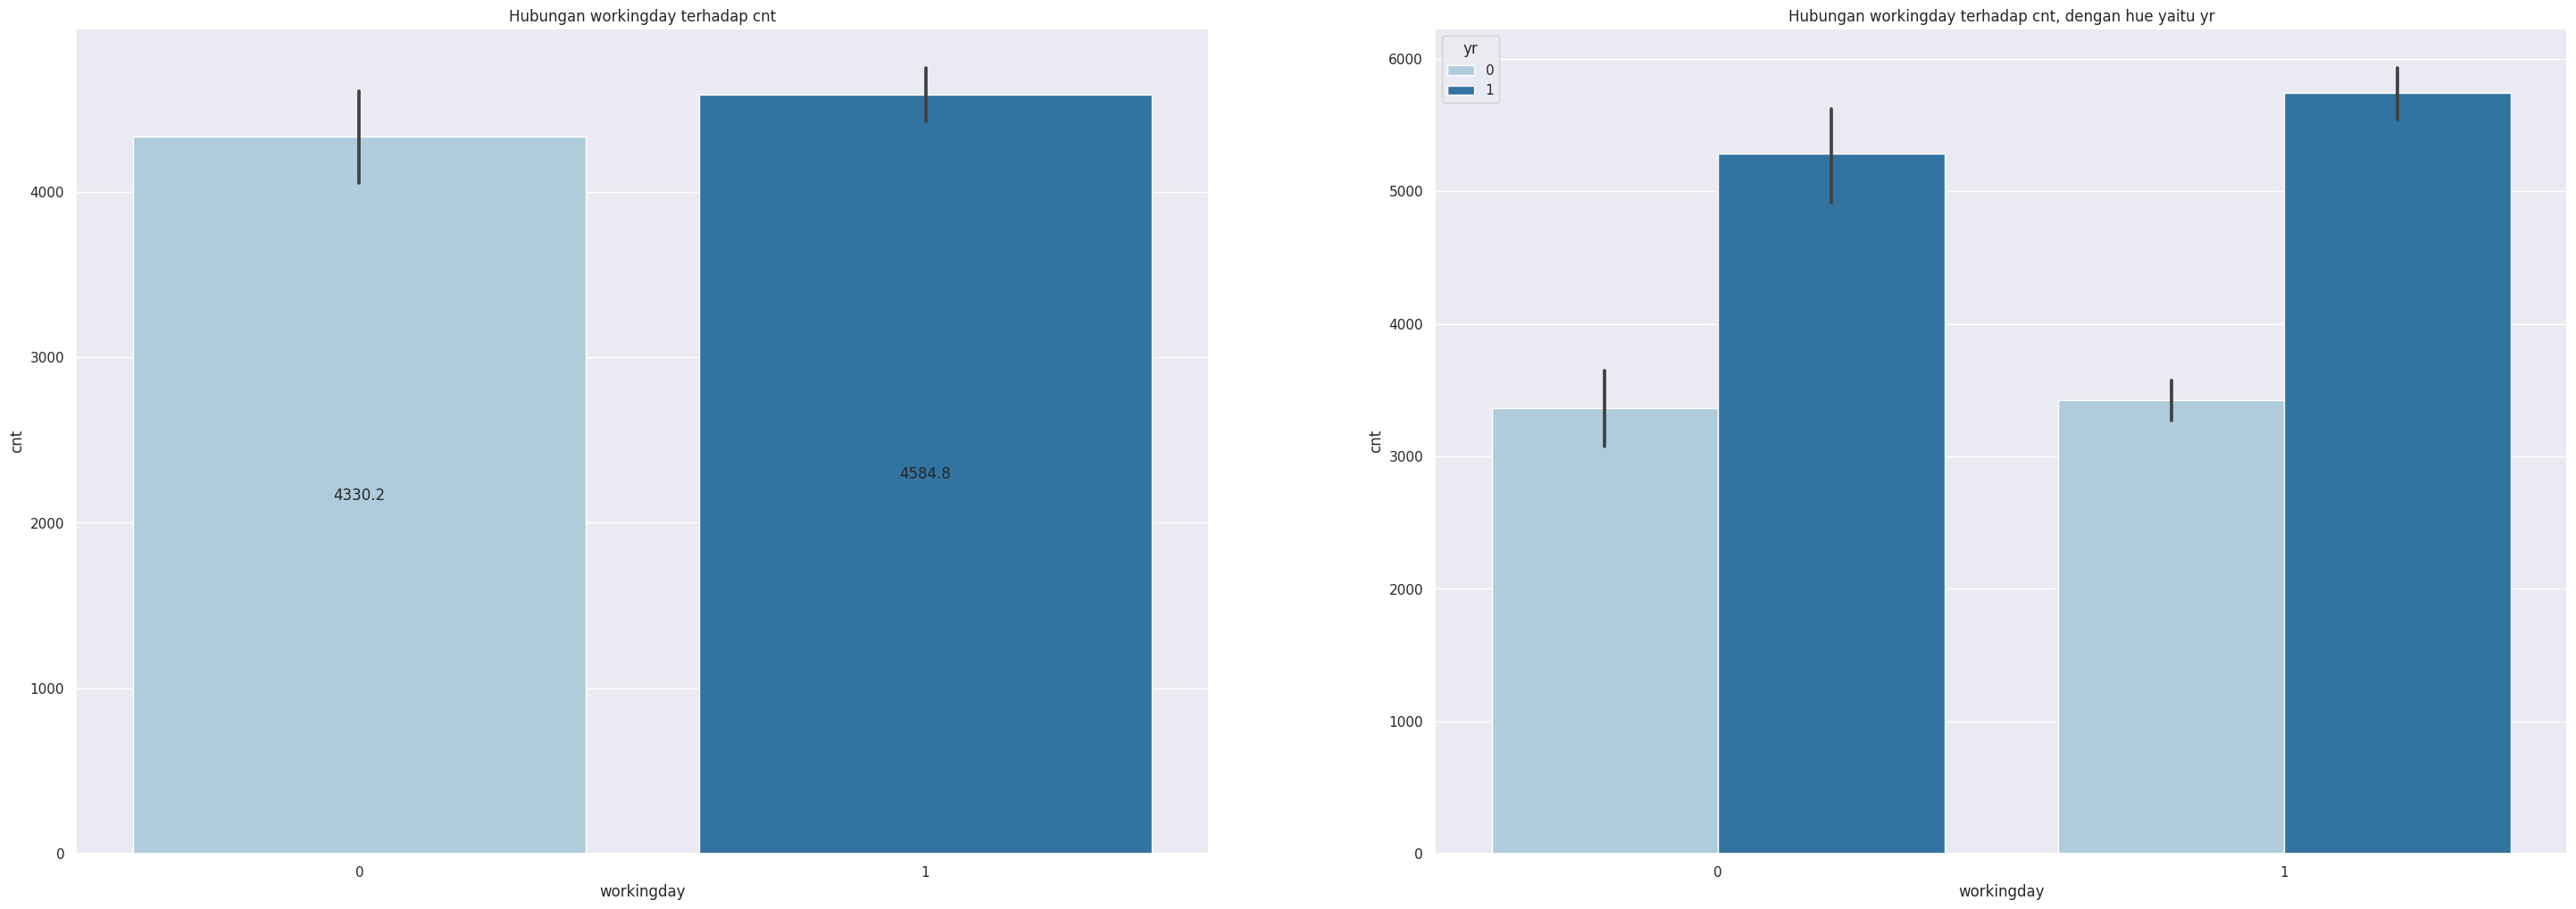

In [79]:
plt.figure(figsize=(36,12))
plt.subplot(1,2,1)
plt.title("Hubungan workingday terhadap cnt")
ax = sns.barplot(x='workingday',y='cnt', data=day_df,palette='Paired')
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.subplot(1,2,2)
plt.title("Hubungan workingday terhadap cnt, dengan hue yaitu yr")
ax = sns.barplot(x='workingday',y='cnt', hue='yr', data=day_df,palette='Paired')

Pivot di atas 51% dari pemesanan sepeda terjadi pada 'hari kerja' dengan rata-rata 4584.8 pemesanan (selama dua tahun). Hal ini menunjukkan bahwa hari kerja memiliki tren dan dapat dipertimbangan digunakan untuk memprediksi jumlah penyewa sepeda lebih lanjut.

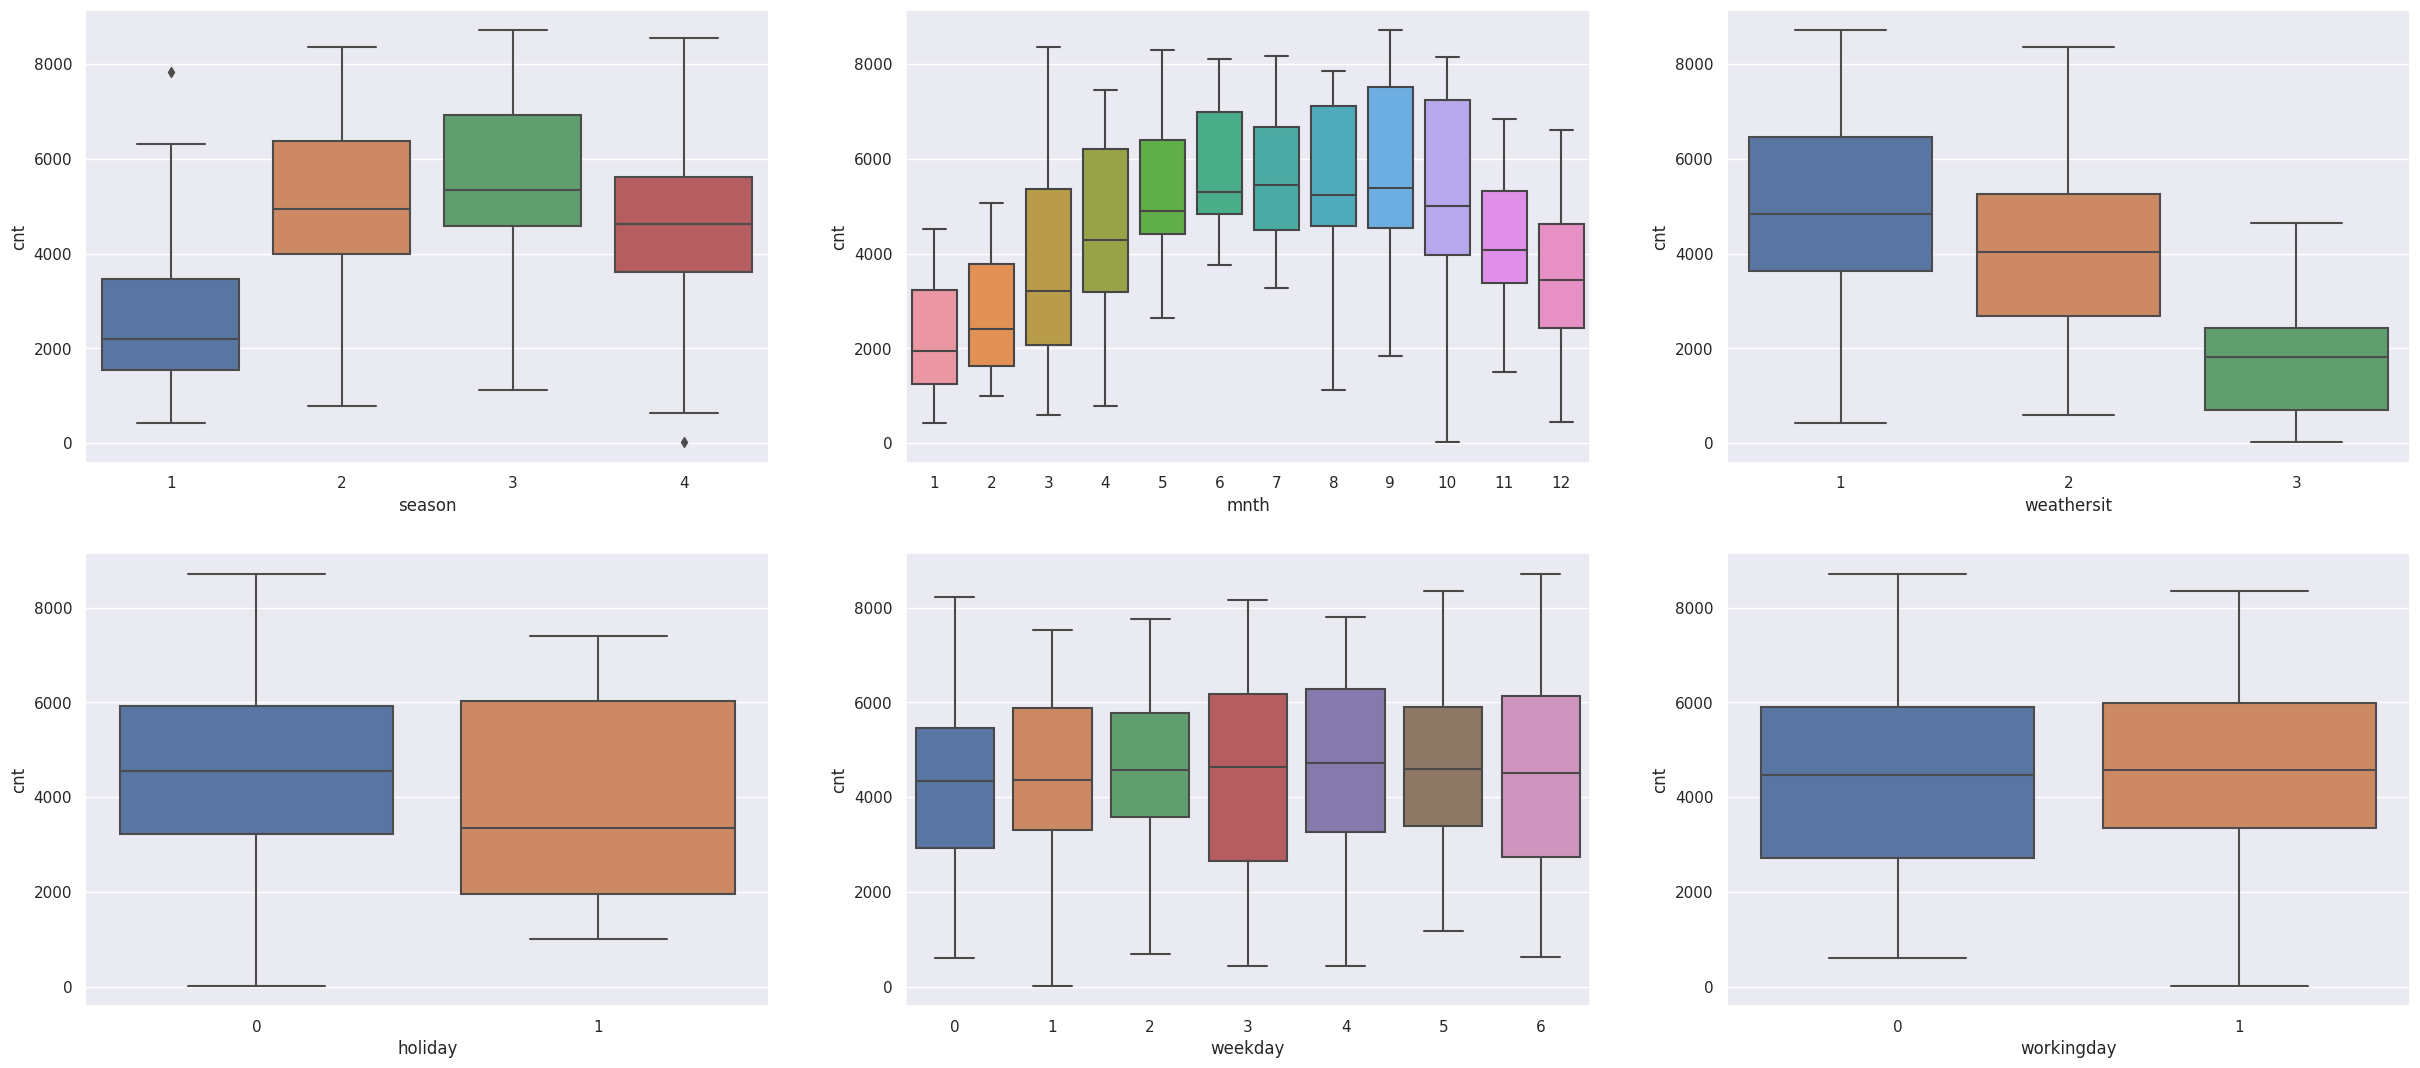

In [80]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day_df)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=day_df)
plt.subplot(3,3,3)
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.show()

<Axes: xlabel='holiday', ylabel='cnt'>

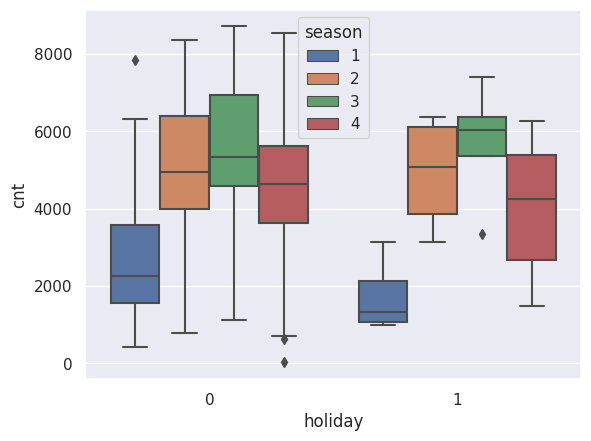

In [81]:
sns.boxplot(x='holiday', y='cnt', hue='season', hue_order=[1, 2, 3, 4], data=day_df)

<Axes: >

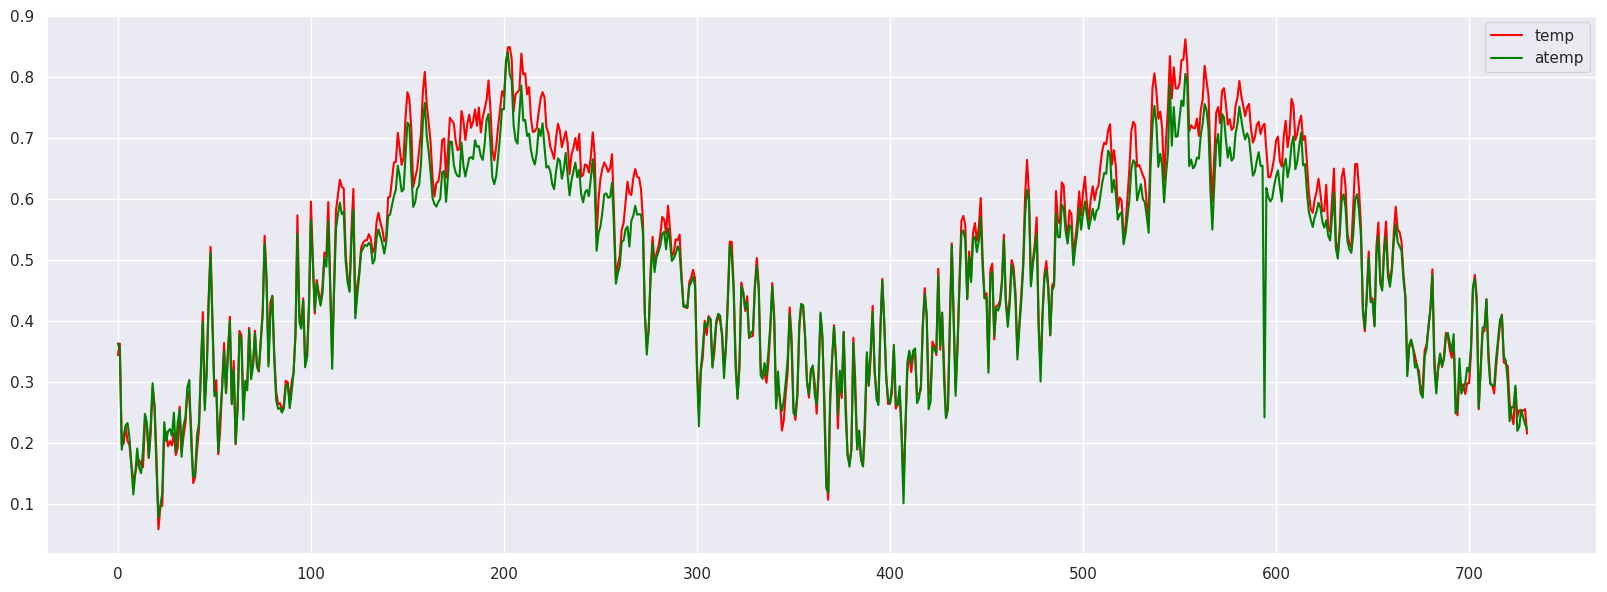

In [82]:
day_df[['temp','atemp']].plot(figsize=(20, 7), color=['red', 'green'])

Dari analisis korelasi di atas, temp dan atemp saling berkorelasi  sehingga tidak banyak perbedaan antara kedua atribut tersebut